In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from datasets.nuscenes import compile_data
from datasets.nuscenes_ood import compile_data as compile_data_ood
from models.baseline import *
from models.evidential import *

import tools.loss

from time import time

In [4]:
num_workers = [1, 2, 4, 8, 16, 32, 64]
split = 'mini'
DATAROOT = "../../data/nuscenes"

In [5]:
tl, vl = compile_data(split, DATAROOT, num_workers=32, batch_size=2)

In [14]:
images, intrinsics, extrinsics, labels = tl.dataset[100]

In [15]:
from tools.utils import *
%matplotlib inline
import matplotlib.pyplot as plt

(-0.5, 199.5, 199.5, -0.5)

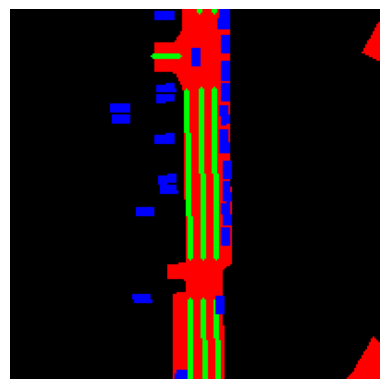

In [16]:
plt.imshow(map_rgb(labels) / 255)
plt.axis("off")

In [9]:
model = Baseline([7], loss_type='focal')
model.load(torch.load("../nuscenes/fiery_baseline/9.pt"))

Loaded pretrained weights for efficientnet-b4


In [17]:
np.set_printoptions(suppress=True)

# images, intrinsics, extrinsics, labels = vl.dataset[0]
images = images[None].to(7)
intrinsics = intrinsics[None].to(7)
extrinsics = extrinsics[None].to(7)

In [18]:
preds = model(images, intrinsics, extrinsics)
preds = model.activate(preds)

(-0.5, 199.5, 199.5, -0.5)

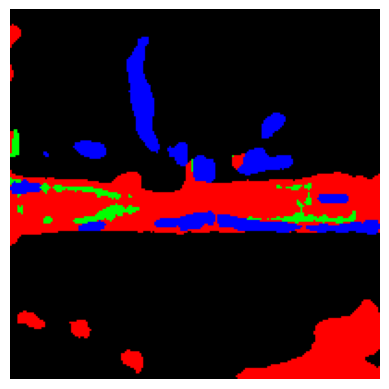

In [19]:
plt.imshow(map_rgb(preds[0]) / 255)
plt.axis("off")

(-0.5, 199.5, 199.5, -0.5)

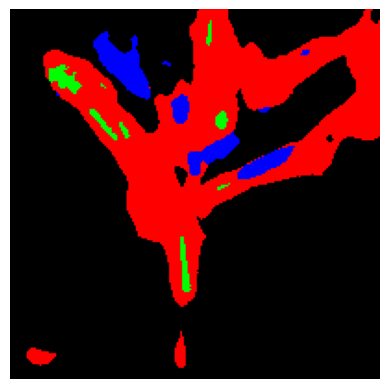

In [13]:
plt.imshow(map_rgb(preds[0]) / 255)
plt.axis("off")

In [156]:
pts = model.backbone.module.get_geometry(intrinsics, extrinsics).cpu().numpy()
np.sum(pts)

662674.7

(-50.0, 50.0)

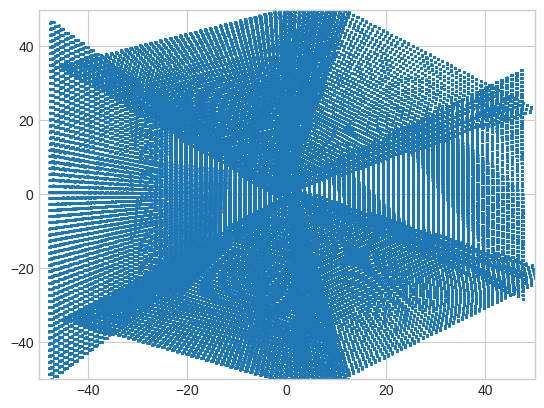

In [157]:
plt.scatter(pts[:, :, :, :, :, 0].reshape(-1), pts[:, :, :, :, :, 1].reshape(-1), s=1)
plt.xlim((-50, 50))
plt.ylim((-50, 50))